This notebook was made to see the particle movement which reflect surface currents between new river treatment simulation and the original one

In [1]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools

from salishsea_tools import (nc_tools,viz_tools)

import matplotlib.cm as cm

from matplotlib import animation

from numpy import *
from pylab import *

load bathymetry

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea5.nc','r')

surface particles

In [3]:
f = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/result/14days_norefraxml/ariane_trajectories_qualitative.nc','r')

In [4]:
nc_tools.show_variables(f)

[u'init_x', u'init_y', u'init_z', u'init_t', u'init_age', u'init_transp', u'final_x', u'final_y', u'final_z', u'final_t', u'final_age', u'final_transp', u'traj_lon', u'traj_lat', u'traj_depth', u'traj_time']


In [5]:
lont=f.variables['traj_lon']
latt=f.variables['traj_lat']
dept=f.variables['traj_depth']
xs=f.variables['init_x']
ys=f.variables['init_y']

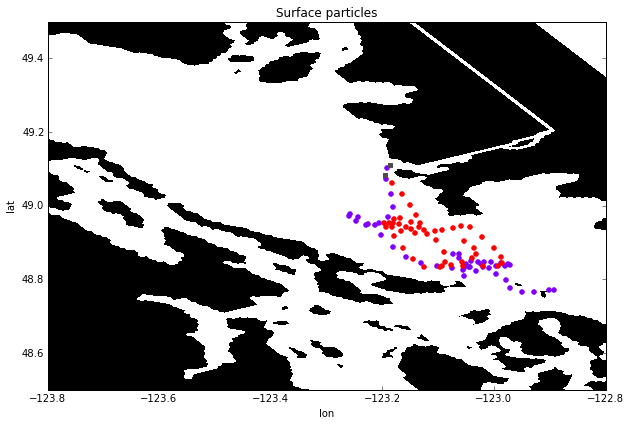

In [8]:
n = np.arange(2)
colors = cm.rainbow(np.linspace(0, 1, len(n)))

# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))

for N,c in zip(n,colors):
    ax.scatter(lont[1:,N],latt[1:,N],color=c)
    ax.scatter(lont[0,N],latt[0,N],color='0.30',marker='s')

viz_tools.plot_land_mask(ax,grid,coords='map')
ax.set_xlim([-123.8,-122.8])
ax.set_ylim([48.5,49.5])

ax.set_title('Surface particles')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

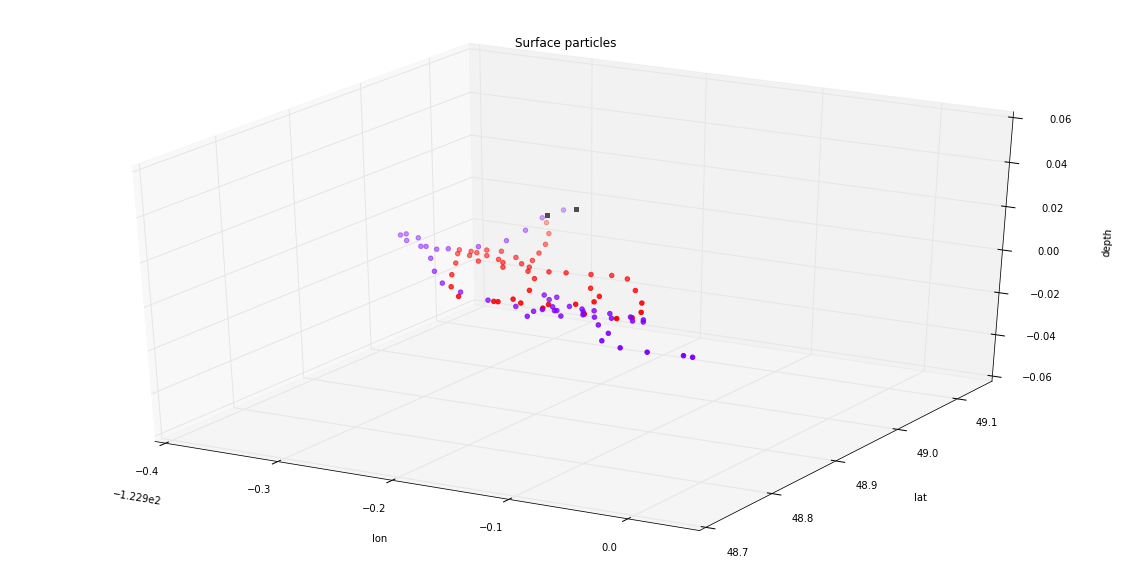

In [9]:
# 3D
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')

for N,c in zip(n,colors):
    ax.scatter(lont[1:,N],latt[1:,N],dept[1:,N],color=c)
    ax.scatter(lont[0,N],latt[0,N],dept[0,N],color='0.30',marker='s')
    
    
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('depth')
ax.set_title('Surface particles')